# In class Exam

## Question 1 Stock Analysis Using Python

In [46]:
#import critical python library
import numpy as np
import pandas as pd
import yfinance as yf
import yesg
import matplotlib.pyplot as plt

### 1.Download Monthly Stock Price Data

#### My surname is Xue, so I should choose Exxon Mobil Corp. The symbol is "XOM".

In [7]:
# specifying interval to 1mo representing 1 month can get monthly data
data=yf.download("XOM", start="2015-01-01",end="2019-12-31",interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [8]:
#take a look at the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,92.250000,93.050003,86.029999,87.419998,58.472134,326819500
2015-02-01,87.849998,93.449997,87.500000,88.540001,59.221252,276447700
2015-03-01,88.339996,88.519997,82.680000,85.000000,57.281403,330260500
2015-04-01,85.699997,88.669998,83.809998,87.370003,58.878525,251671200
2015-05-01,87.849998,90.089996,84.769997,85.199997,57.416161,198924100


### 2. Calculating Monthly Log Returns and Annualized Return.

In [9]:
# calculate log returns
data["Monthly_Log_Return"]=np.log(data["Adj Close"]/data["Adj Close"].shift(1))

In [10]:
# calculate the annualized return by multiply the average monthly log return by 12.
annualized_return=data["Monthly_Log_Return"].mean()*12

In [11]:
print(f"Annualized Return: {annualized_return*100:.2f}%")

Annualized Return: -0.65%


### 3.Calculate Annualised Volatility

In [14]:
#calculate the annualized volatility by multiply the monthly volatility by square root of 12
annualized_volatility=data["Monthly_Log_Return"].std()*np.sqrt(12)

In [15]:
print(f"Annualized Volatility:{annualized_volatility*100:.2f}%")

Annualized Volatility:18.34%


### 4. Download ESG Data and Handle Missing Values.

#### Download ESG data for this stock within the same timeframe

In [24]:
esg=yesg.get_historic_esg("XOM")

In [27]:
#take a look at the data
esg.head()

,Total-Score,E-Score,S-Score,G-Score,number
Date,,,,,
2014-09-01,66.0,51.0,76.0,69.0,0
2014-10-01,65.0,51.0,76.0,69.0,1
2014-11-01,66.0,51.0,76.0,69.0,2
2014-12-01,66.0,51.0,76.0,69.0,3
2015-01-01,65.0,51.0,73.0,69.0,4


In [29]:
#get the exact same time period
esg["number"]=np.arange((len(esg["Total-Score"]))) #generate a number column for knowing the exact rows of needed time period
esg.head()

,Total-Score,E-Score,S-Score,G-Score,number
Date,,,,,
2014-09-01,66.0,51.0,76.0,69.0,0
2014-10-01,65.0,51.0,76.0,69.0,1
2014-11-01,66.0,51.0,76.0,69.0,2
2014-12-01,66.0,51.0,76.0,69.0,3
2015-01-01,65.0,51.0,73.0,69.0,4


In [33]:
#check the row of the esg data for the last wanted time 2019-12-31 (should be the first date of December in the esg dataset)
row=esg.loc["2019-12-01"]
row

Total-Score    37.46
E-Score        18.64
S-Score        10.16
G-Score         8.65
number         63.00
Name: 2019-12-01 00:00:00, dtype: float64

In [41]:
esgdata=esg.iloc[4:64] # get the wanted same time period

In [42]:
#take a look
esgdata.head()

,Total-Score,E-Score,S-Score,G-Score,number
Date,,,,,
2015-01-01,65.0,51.0,73.0,69.0,4
2015-02-01,65.0,51.0,73.0,69.0,5
2015-03-01,65.0,51.0,73.0,69.0,6
2015-04-01,65.0,51.0,73.0,69.0,7
2015-05-01,65.0,51.0,73.0,69.0,8


In [43]:
esgdata.tail()

,Total-Score,E-Score,S-Score,G-Score,number
Date,,,,,
2019-08-01,63.97,54.90,75.36,58.42,59
2019-09-01,63.97,54.90,75.36,58.42,60
2019-10-01,63.97,54.90,75.36,58.42,61
2019-11-01,63.65,54.90,75.36,57.14,62
2019-12-01,37.46,18.64,10.16,8.65,63


#### handle missing value

In [45]:
# check if their are any missing value
print(esgdata.isnull().any())

Total-Score    False
E-Score        False
S-Score        False
G-Score        False
number         False
dtype: bool


#### This mean there is no missing value, no need to handle it anymore.

In [48]:
#get the ESG Total Score data
esgtotalscore=esgdata["Total-Score"]
esgtotalscore

Date
2015-01-01    65.00
2015-02-01    65.00
2015-03-01    65.00
2015-04-01    65.00
2015-05-01    65.00
2015-06-01    65.00
2015-07-01    65.00
2015-08-01    65.00
2015-09-01    65.00
2015-10-01    64.00
2015-11-01    67.00
2015-12-01    67.00
2016-01-01    64.30
2016-02-01    64.30
2016-03-01    64.30
2016-04-01    65.32
2016-05-01    64.75
2016-06-01    64.49
2016-07-01    64.49
2016-08-01    64.49
2016-09-01    64.52
2016-10-01    64.52
2016-11-01    63.76
2016-12-01    63.76
2017-01-01    63.76
2017-02-01    63.76
2017-03-01    64.15
2017-04-01    64.15
2017-05-01    64.15
2017-06-01    64.15
2017-07-01    64.15
2017-08-01    64.15
2017-09-01    64.15
2017-10-01    62.91
2017-11-01    62.91
2017-12-01    62.90
2018-01-01    62.90
2018-02-01    62.61
2018-03-01    62.61
2018-04-01    64.11
2018-05-01    64.11
2018-06-01    64.11
2018-07-01    64.11
2018-08-01    64.11
2018-09-01    63.97
2018-10-01    63.97
2018-11-01    63.97
2018-12-01    63.97
2019-01-01    63.97
2019-02-01    6

#### Plot the figure

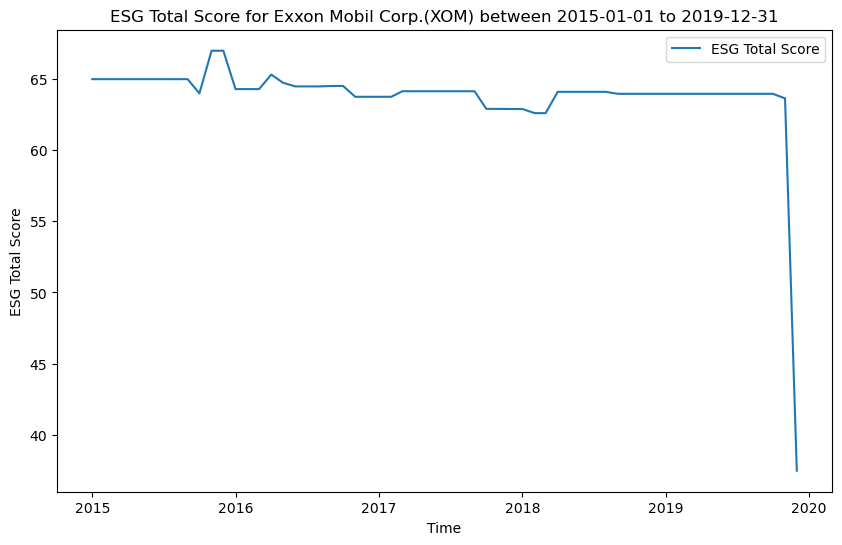

In [51]:
#plotting the esg total score data between 2015-01-01 to 2019-12-31
plt.figure(figsize=(10,6))
plt.plot(esgtotalscore,label="ESG Total Score")
plt.xlabel("Time")
plt.ylabel("ESG Total Score")
plt.title("ESG Total Score for Exxon Mobil Corp.(XOM) between 2015-01-01 to 2019-12-31")
plt.legend()
plt.show()

### 5. Calculate and Analyse the Correlation between Stock Price and ESG

In [52]:
correlation=data["Adj Close"].corr(esgtotalscore)

In [53]:
print(f"The correlation between the log returns of Exxon Mobil Corp and ESG Rating from 2015-01-01 to 2019-12-31 is {correlation:.4f}")

The correlation between the log returns of Exxon Mobil Corp and ESG Rating from 2015-01-01 to 2019-12-31 is 0.0183


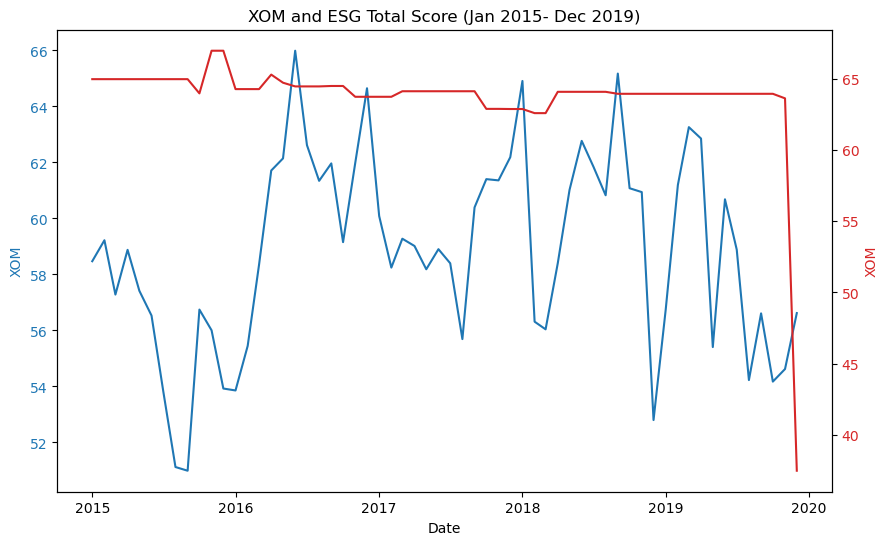

In [54]:
fig,ax1=plt.subplots(figsize=(10,6))

#plotting XOM stock price
color="tab:blue"
ax1.set_xlabel("Date")
ax1.set_ylabel("XOM", color=color)
ax1.plot(data["Adj Close"], color=color)
ax1.tick_params(axis="y", labelcolor=color)

#plotting ESG ratings
color="tab:red"
ax2=ax1.twinx()
ax2.set_ylabel("XOM",color=color)
ax2.plot(esgtotalscore, color= color)
ax2.tick_params(axis="y", labelcolor=color)

# adding title and displaying the plot
plt.title("XOM and ESG Total Score (Jan 2015- Dec 2019)")
plt.show()

## Question 2 : Climate Analysis Based on Birthplace

#### I was born in Beijing in October 2000. So I need to calculate the HDD in Beijing in October 2022. The latitude, longtitude and altitude of Beijing is 39.9042N, 116.4074E, 49m, respectively.

#### Extracting weather data

In [95]:
# import critical libraries
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [96]:
#time period
start=datetime(2022,10,1)
end=datetime(2022,10,31)

In [97]:
#location point (latitude,longtitude,altitude) for Beijing
Beijing=Point(39.9042,116.4074,49)

In [98]:
#fetch the weather data
wdata=Daily(Beijing,start,end)
wdata=wdata.fetch()

In [99]:
#take a look at the data
wdata.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-10-01,21.9,18.0,29.4,2.3,NaN,131.0,7.1,NaN,1012.6,NaN
2022-10-02,19.3,17.2,24.8,3.0,NaN,54.0,5.6,NaN,1012.2,NaN
2022-10-03,12.4,10.0,20.5,1.5,NaN,6.0,13.2,NaN,1019.2,NaN
2022-10-04,8.6,4.0,20.5,0.0,NaN,11.0,11.0,NaN,1030.5,NaN
2022-10-05,8.8,1.0,16.7,0.0,NaN,27.0,6.3,NaN,1028.5,NaN


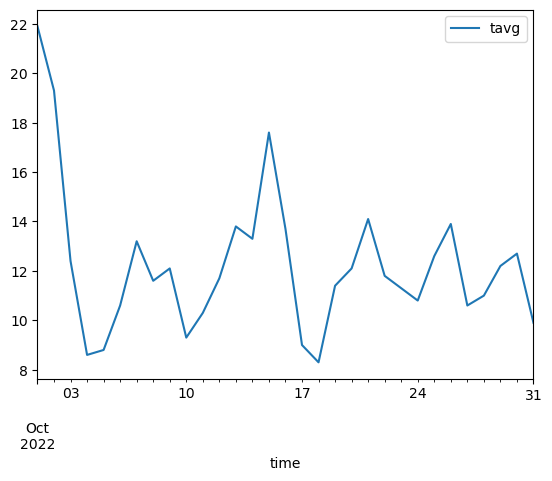

In [100]:
wdata.plot(y=["tavg"])
plt.show()

#### Calculating HDD

\\[ \text{HDD} = \max(18 - T_{\text{avg}}, 0) \\]
Where:
- \\( T_{\text{avg}} \\) is the average temperature for a day.

In [102]:
T_base=18 # set the temperature base as 18
hdds=[max(T_base-temp,0) for temp in wdata.tavg] #daily hdd is just 18 minus daily average temperature
HDD=sum(hdds) # HDD for this month is simply the sum of everyday's hdds
print("HDD:", HDD)

HDD: 183.30000000000004
